In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import ssl
from pandas import Series
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

ssl._create_default_https_context = ssl._create_unverified_context
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

#coding:utf-8
import json
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

import time, json, requests
# 抓取腾讯疫情实时json数据
url = '/Users/apple/Desktop/winequality-red.csv'
data = pd.read_csv(url)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
redwine_X = data.drop(['quality'], axis=1).values
redwine_y = data['quality']

In [7]:
data.shape

(1599, 12)

In [10]:
from pygam import LinearGAM
lams = np.random.rand(100, 11) # 11 is the # of feature columns
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(redwine_X, redwine_y, lam=lams)

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(100, 11)


100% (100 of 100) |######################| Elapsed Time: 0:00:44 Time:  0:00:44


In [ ]:
#####description
#GAM(s(0) + l(1) + f(2) + te(3, 4))
#will fit a spline term on feature 0, a linear term on feature 1, a factor term on feature 2, 
#and a tensor term on features 3 and 4.

<Figure size 432x288 with 0 Axes>

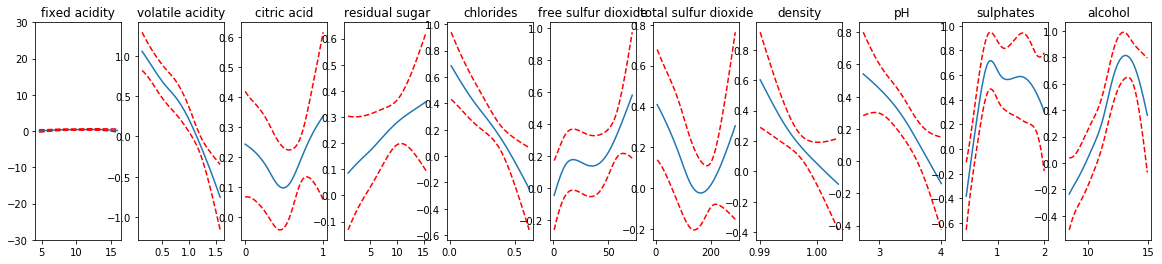

In [14]:
titles = data.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(20, 4))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [ ]:
# As shown above, volatile acidity, chlorides, total sulfur dioxide, density, and pH 
#have a negative correlation with the quality score